## **Εξαγωγή χαρακτηριστηκών ήχου**

**Περιβάλλουσα πλάτους**



In [16]:
#Εισαγωγή βιβλιοθηκών

import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#Αρχικοποίηση μήκους πλαισίου,μήκους βήματος 
FRAME_SIZE=512 
HOP_LENGTH=256

#Όταν το βήμα είναι μισό του μήκους πλαισίου έχουμε 50% επικάλυψη πλαισίων

> H βιβλιοθήκη [librosa](https://librosa.org/doc/latest/index.html) μας δίνει την δυνατότητα να φορτώσουμε ένα αρχείο ήχου με την εντολή [librosa.load](https://librosa.org/doc/main/generated/librosa.load.html) συναρτήσει του χρόνου.

Για την ανάγνωση αρχείων στο Google Collab προτείνεται η διαδικασία που φαίνεται εδώ: https://neptune.ai/blog/google-colab-dealing-with-files

In [18]:
#Αρχικοποίηση αρχείων/δειγμάτων
file_path=("/content/piano C#.wav")
audio_sample, sr =librosa.load(file_path)

Για την εξυπηρέτηση των αναγκών της εγασίας αυτής, προτιμήθηκε η χρήση αρχείων μικρής διάρκειας και μίας νότας. 

*Αν θέλαμε να φορτώσουμε κάποιο δοκιμαστικό αρχείο ήχου από την βιλβιοθήκη librosa :*


```
filename= librosa.ex('trumpet')
audio_sample, sr =librosa.load(filename)

```











> Στην συνέχεια μπορούμε να αναπαράγουμε το σήμα μέσω της βιβλιοθήκης [IPython](https://ipython.org/).



In [19]:
#Αναπαραγωγή ήχου
ipd.Audio(data=audio_sample,rate=sr)

> **Υπολογισμός περιβάλλουσας πλάτους με δική μας συνάρτηση.**

> Για τον υπολογισμό της περιβάλλουσας πλάτους επεξεργαζόμαστε το σήμα πλαίσιο προς πλαίσιο, δημιουργόντας μία λίστα με τη μέγιστη τιμή πλάτους για κάθε πλαίσιο.

In [20]:
def amplitude_envelope(signal, frame_size, hop_length):
    # Αρχικοποίηση κενής λίστας
    amplitude_envelope = []
    
    # Βρόχος επεξεργασίας πλαίσιο-προς-πλαίσιο
    for i in range(0, len(signal), hop_length): 
        # Υπολοηισμός μέγιστης τιμής για το τρέχον πλαίσιο
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        # Επισύναψη κάθε μέγιστης τιμής στη λίστα περιβάλλουσας πλάτους
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)   

In [21]:
# Κλήση της συνάρτησης και υπολογισμός περιβάλλουσας του audio sample
audio_sample_env = amplitude_envelope(audio_sample, FRAME_SIZE, HOP_LENGTH)

In [22]:
# Μετατροπή πλαισίων σε χρόνο
frames = range(len(audio_sample_env))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

Text(0.5, 926.4352941176471, 'Χρόνος')

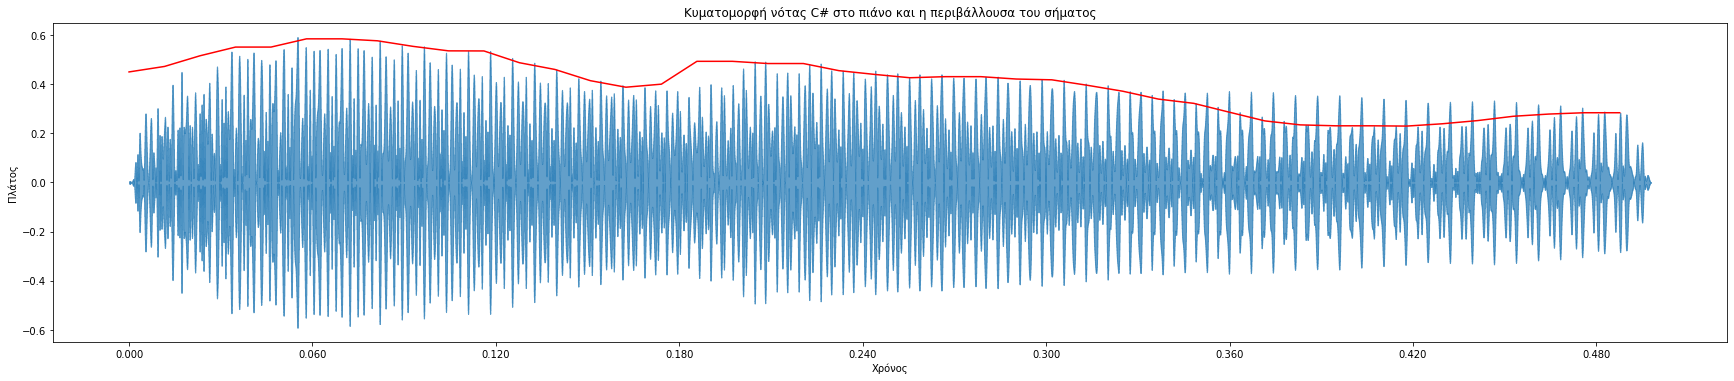

In [23]:
# Δημιουργία γραφήματος κυματομορφής ολόκληρου του audio sample 
plt.figure(figsize=(30, 20))
ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(audio_sample, alpha=0.7)
plt.plot(t, audio_sample_env, color="r")
plt.title("Κυματομορφή νότας C# στο πιάνο και η περιβάλλουσα του σήματος")
plt.ylabel("Πλάτος")
plt.xlabel("Χρόνος")